# DL - Pneumonia Diagnosis using EfficientNet

## Load Dataset

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1JwIyR97fXRfaciFjm4NLualTzq2XaDTg

Downloading...
From (original): https://drive.google.com/uc?id=1JwIyR97fXRfaciFjm4NLualTzq2XaDTg
From (redirected): https://drive.google.com/uc?id=1JwIyR97fXRfaciFjm4NLualTzq2XaDTg&confirm=t&uuid=7c325511-1f89-4db9-b8ca-05624d713d72
To: /content/archive.zip
100% 2.46G/2.46G [01:02<00:00, 39.5MB/s]


In [ ]:
import zipfile
zip_file_path = '/content/archive.zip'
folder_path = '/content/Dataset'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
import os
file_path = "/content/archive.zip"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

/content/archive.zip has been deleted successfully.


In [ ]:
import os

# Define the parent folder
parent_folder_path = "/content/Dataset"

# Recursively iterate through all files in the parent folder
for dirpath, dirnames, filenames in os.walk(parent_folder_path):
    # Get the number of JPEG files in the current directory
    jpeg_count = sum(1 for filename in filenames if filename.lower().endswith('.jpeg'))

    # Print the results for the current directory
    if jpeg_count > 0:
        # Get the relative path to the current directory
        relative_path = os.path.relpath(dirpath, parent_folder_path)

        # Print the results
        print(f"{jpeg_count} (.jpeg) files are in {os.path.join(parent_folder_path, relative_path)}")


234 (.jpeg) files are in /content/Dataset/chest_xray/test/NORMAL
390 (.jpeg) files are in /content/Dataset/chest_xray/test/PNEUMONIA
234 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/test/NORMAL
390 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/test/PNEUMONIA
1341 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/train/PNEUMONIA
8 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/val/NORMAL
8 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/val/PNEUMONIA
1583 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/AllData/NORMAL
4273 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/AllData/PNEUMONIA
1341 (.jpeg) files are in /content/Dataset/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/train/PNEUMONIA
8 (.jpeg) files are in /content/Dataset/chest_xray/val/NORMAL
8 (.jpeg) files are in /content/Dataset/ch

## Preprocessing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1JwIyR97fXRfaciFjm4NLualTzq2XaDTg

Downloading...
From (original): https://drive.google.com/uc?id=1JwIyR97fXRfaciFjm4NLualTzq2XaDTg
From (redirected): https://drive.google.com/uc?id=1JwIyR97fXRfaciFjm4NLualTzq2XaDTg&confirm=t&uuid=02246249-3e95-4ee4-b7a7-ee187302c198
To: /content/archive.zip
100% 2.46G/2.46G [00:24<00:00, 102MB/s]


In [ ]:
import zipfile
zip_file_path = '/content/archive.zip'
folder_path = '/content/Dataset'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
import os
file_path = "/content/archive.zip"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

/content/archive.zip has been deleted successfully.


In [ ]:
import os

# Define the parent folder
parent_folder_path = "/content/Dataset"

# Recursively iterate through all files in the parent folder
for dirpath, dirnames, filenames in os.walk(parent_folder_path):
    # Get the number of JPEG files in the current directory
    jpeg_count = sum(1 for filename in filenames if filename.lower().endswith('.jpeg'))

    # Print the results for the current directory
    if jpeg_count > 0:
        # Get the relative path to the current directory
        relative_path = os.path.relpath(dirpath, parent_folder_path)

        # Print the results
        print(f"{jpeg_count} (.jpeg) files are in {os.path.join(parent_folder_path, relative_path)}")


234 (.jpeg) files are in /content/Dataset/chest_xray/test/NORMAL
390 (.jpeg) files are in /content/Dataset/chest_xray/test/PNEUMONIA
234 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/test/NORMAL
390 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/test/PNEUMONIA
1341 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/train/PNEUMONIA
8 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/val/NORMAL
8 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/val/PNEUMONIA
1583 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/AllData/NORMAL
4273 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/AllData/PNEUMONIA
1341 (.jpeg) files are in /content/Dataset/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/train/PNEUMONIA
8 (.jpeg) files are in /content/Dataset/chest_xray/val/NORMAL
8 (.jpeg) files are in /content/Dataset/ch

In [ ]:
import os
import shutil
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.folder import default_loader

# Set the path to your input folder here
input_folder_path = "/content/Dataset/chest_xray/chest_xray"

# Define the classes in your dataset
classes = ["NORMAL", "PNEUMONIA"]

# Define the path to the output folder where you want to save the combined data
output_folder_path = os.path.join(input_folder_path, "AllData")

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Loop through the train, test, and val folders
for split in ["train", "test", "val"]:
    split_folder_path = os.path.join(input_folder_path, split)

    # Loop through the NORMAL and PNEUMONIA folders in each split folder
    for class_name in classes:
        class_folder_path = os.path.join(split_folder_path, class_name)

        # Loop through the image files in each class folder and copy them to the output folder
        for file_name in os.listdir(class_folder_path):
            if file_name.endswith(".jpeg"):
                src_path = os.path.join(class_folder_path, file_name)
                dst_path = os.path.join(output_folder_path, class_name, file_name)

                # Create the class folder in the output folder if it doesn't exist
                if not os.path.exists(os.path.join(output_folder_path, class_name)):
                    os.makedirs(os.path.join(output_folder_path, class_name))

                # Copy the image file to the output folder
                shutil.copyfile(src_path, dst_path)

# Define a custom PyTorch dataset to load the combined data
class CustomDataset(Dataset):
    def __init__(self, root, classes, transform=None, loader=default_loader):
        self.root = root
        self.classes = classes
        self.transform = transform
        self.loader = loader
        self.samples = []

        # Loop through the NORMAL and PNEUMONIA classes and their respective image folders in the output folder
        for class_name in classes:
            class_folder_path = os.path.join(root, class_name)
            for file_name in os.listdir(class_folder_path):
                if file_name.endswith(".jpeg"):
                    self.samples.append((os.path.join(class_folder_path, file_name), classes.index(class_name)))

    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target

    def __len__(self):
        return len(self.samples)

# Load the combined data using the custom PyTorch dataset
dataset = CustomDataset(output_folder_path, classes)

# Use the PyTorch DataLoader to create batches of data for training/testing
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
import os
import shutil
import random

# Set the path to the "FinalDataset" folder
data_dir = "/content/Dataset/chest_xray/chest_xray/AllData"

# Set the path to the output directory
output_dir = "/content/FinalDatasetTVT2"

# Set the train/validation/test split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create the output directories
os.makedirs(os.path.join(output_dir, "train", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train", "PNEUMONIA"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "PNEUMONIA"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "PNEUMONIA"), exist_ok=True)

# Get the list of image files in each class folder
normal_files = os.listdir(os.path.join(data_dir, "NORMAL"))
pneumonia_files = os.listdir(os.path.join(data_dir, "PNEUMONIA"))

# Shuffle the lists to randomize the order
random.shuffle(normal_files)
random.shuffle(pneumonia_files)

# Calculate the number of images for each split
num_normal = len(normal_files)
num_pneumonia = len(pneumonia_files)
num_train_normal = int(num_normal * train_ratio)
num_train_pneumonia = int(num_pneumonia * train_ratio)
num_val_normal = int(num_normal * val_ratio)
num_val_pneumonia = int(num_pneumonia * val_ratio)
num_test_normal = int(num_normal * test_ratio)
num_test_pneumonia = int(num_pneumonia * test_ratio)

# Copy the image files to the output directories for each split
for i, file in enumerate(normal_files):
    if i < num_train_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "train", "NORMAL"))
    elif i < num_train_normal + num_val_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "val", "NORMAL"))
    else:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "test", "NORMAL"))
for i, file in enumerate(pneumonia_files):
    if i < num_train_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "train", "PNEUMONIA"))
    elif i < num_train_pneumonia + num_val_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "val", "PNEUMONIA"))
    else:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "test", "PNEUMONIA"))


In [ ]:
import os
import shutil
import random

# Set the path to the "FinalDataset" folder
data_dir = "/content/Dataset/chest_xray/chest_xray/AllData"

# Set the path to the output directory
output_dir = "/content/FinalDatasetTVT4"

# Set the train/validation/test split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create the output directories
os.makedirs(os.path.join(output_dir, "train", "0"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train", "1"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "0"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "1"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "0"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "1"), exist_ok=True)

# Get the list of image files in each class folder
normal_files = os.listdir(os.path.join(data_dir, "NORMAL"))
pneumonia_files = os.listdir(os.path.join(data_dir, "PNEUMONIA"))

# Shuffle the lists to randomize the order
random.shuffle(normal_files)
random.shuffle(pneumonia_files)

# Calculate the number of images for each split
num_normal = len(normal_files)
num_pneumonia = len(pneumonia_files)
num_train_normal = int(num_normal * train_ratio)
num_train_pneumonia = int(num_pneumonia * train_ratio)
num_val_normal = int(num_normal * val_ratio)
num_val_pneumonia = int(num_pneumonia * val_ratio)
num_test_normal = int(num_normal * test_ratio)
num_test_pneumonia = int(num_pneumonia * test_ratio)

# Copy the image files to the output directories for each split
for i, file in enumerate(normal_files):
    if i < num_train_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "train", "0"))
    elif i < num_train_normal + num_val_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "val", "0"))
    else:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "test", "0"))
for i, file in enumerate(pneumonia_files):
    if i < num_train_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "train", "1"))
    elif i < num_train_pneumonia + num_val_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "val", "1"))
    else:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "test", "1"))


In [ ]:
from PIL import Image
import os

# Set the path to the directory containing the images
directory = '/content/FinalDatasetTVT4/'

# Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Open the image and convert it to RGB format
            img = Image.open(os.path.join(root, filename)).convert('RGB')

            # Save the image back to the same file
            img.save(os.path.join(root, filename))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from sklearn.metrics import precision_recall_curve
import seaborn as sns

In [ ]:
!pip install efficientnet

## Implementation 1

Found 5496 images belonging to 2 classes.
Found 2890 images belonging to 2 classes.
Found 2881 images belonging to 2 classes.
Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.7311 - accuracy: 0.4453
Epoch 1: val_loss improved from inf to 0.67833, saving model to best_model.h5
1/1 [==============================] - 27s 27s/step - loss: 0.7311 - accuracy: 0.4453 - val_loss: 0.6783 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6406
Epoch 2: val_loss improved from 0.67833 to 0.63588, saving model to best_model.h5
1/1 [==============================] - 11s 11s/step - loss: 0.6342 - accuracy: 0.6406 - val_loss: 0.6359 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.5967 - accuracy: 0.6562
Epoch 3: val_loss improved from 0.63588 to 0.59701, saving model to best_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.5967 - accurac

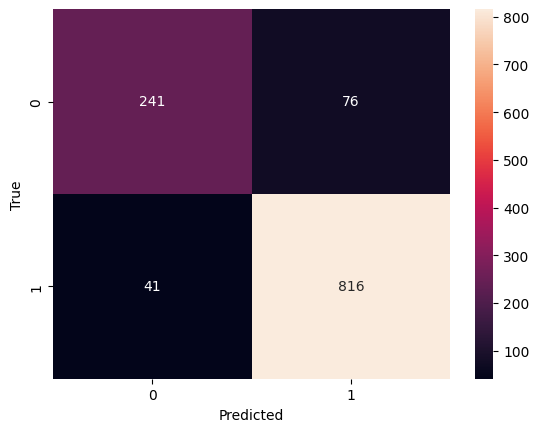

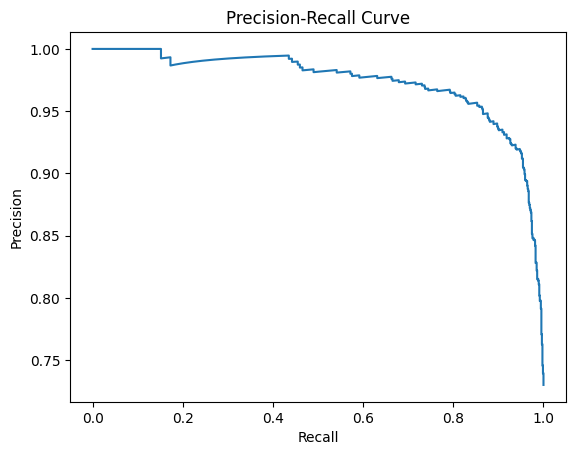

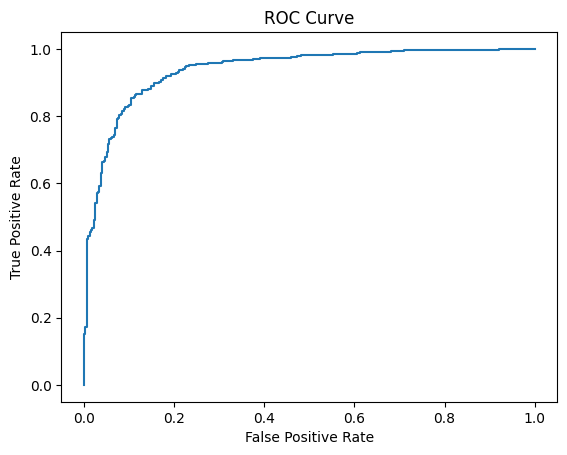

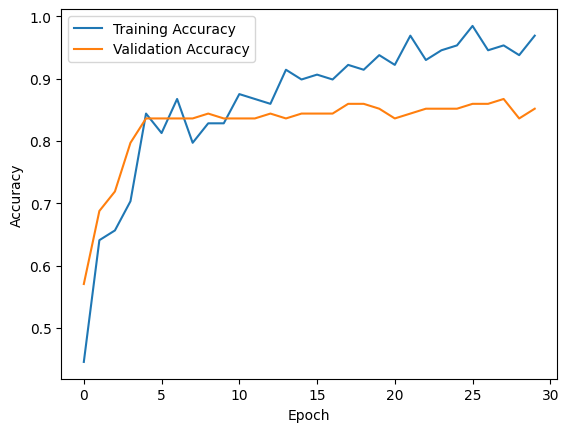

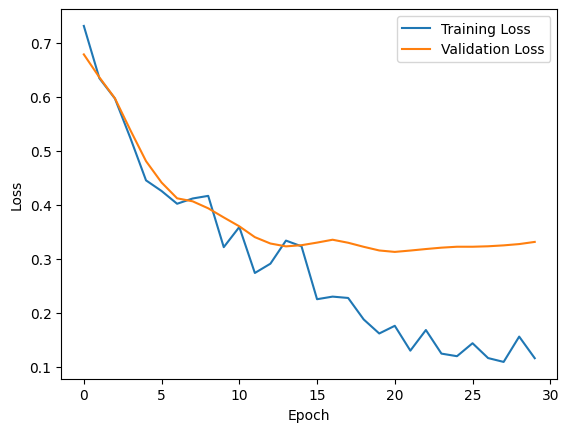

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from efficientnet.tfkeras import EfficientNetB2
import numpy as np
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/FinalDatasetTVT2/train',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    '/content/FinalDatasetTVT2/val',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    '/content/FinalDatasetTVT2/test',
    target_size=(128, 128),
    batch_size=1174,
    class_mode='binary')

# separate data and labels for training set
x_train, y_train = train_generator.next()

# separate data and labels for validation set
x_val, y_val = val_generator.next()

# separate data and labels for test set
x_test, y_test = test_generator.next()

# load pre-trained model
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# class_labels = np.unique(y_train)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# define callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# save the model weights after each epoch if the validation loss decreased
checkpoint = ModelCheckpoint('best_model.h5',
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='val_loss',
                             mode='min', verbose=1)

# reduce learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=10,
                              min_lr=0.0001, verbose=1)

# stop training if the validation loss doesn't improve for 30 consecutive epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=30,
                    batch_size=128,
                    callbacks=[checkpoint, reduce_lr, early_stop],
                    class_weight=class_weights
                    )

# evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

# evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
auc_score = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('A5.pdf')
plt.show()

# plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig('A4.pdf')
plt.show()

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('A3.pdf')
plt.show()

# plot accuracy and loss curves for training and validation sets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('A2.pdf')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('A1.pdf')
plt.show()

model.save('my_model.h5')

## Implementation 2

Found 3512 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 1174 images belonging to 2 classes.
Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.7229 - accuracy: 0.6094
Epoch 1: val_loss improved from inf to 0.63159, saving model to best_model.h5
1/1 [==============================] - 10s 10s/step - loss: 0.7229 - accuracy: 0.6094 - val_loss: 0.6316 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 0.6418 - accuracy: 0.6094
Epoch 2: val_loss improved from 0.63159 to 0.57197, saving model to best_model.h5
1/1 [==============================] - 1s 894ms/step - loss: 0.6418 - accuracy: 0.6094 - val_loss: 0.5720 - val_accuracy: 0.8359 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7188
Epoch 3: val_loss improved from 0.57197 to 0.49042, saving model to best_model.h5
1/1 [==============================] - 1s 771ms/step - loss: 0.5372 - acc

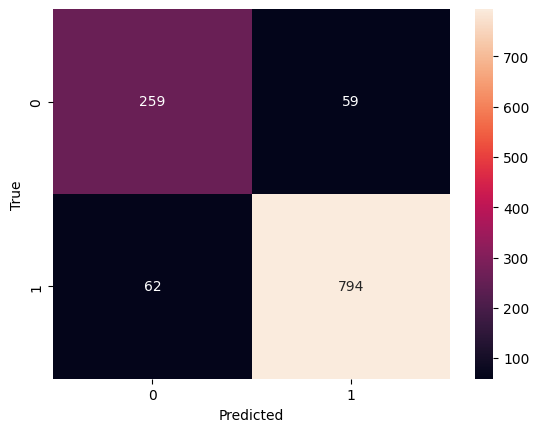

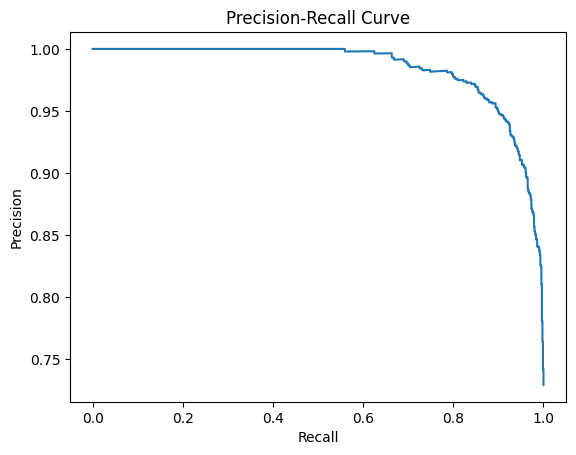

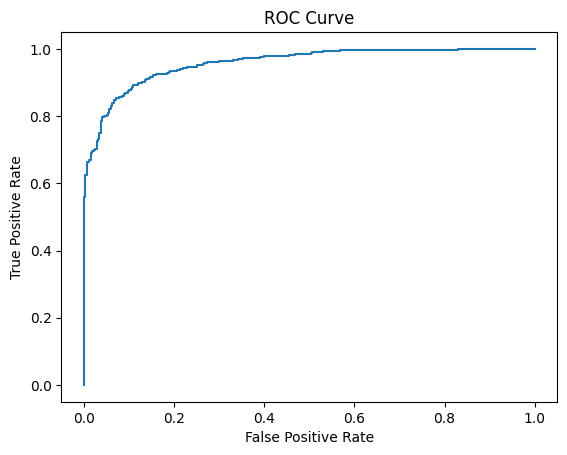

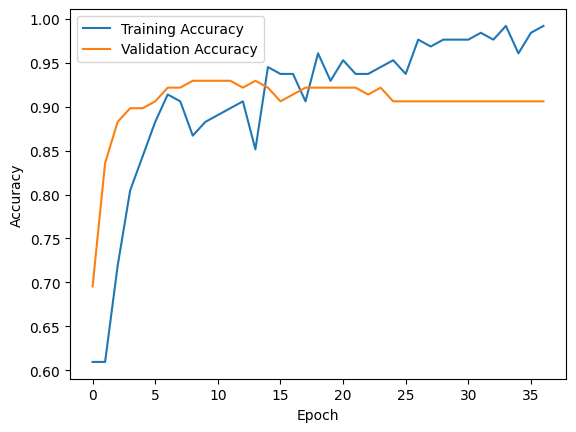

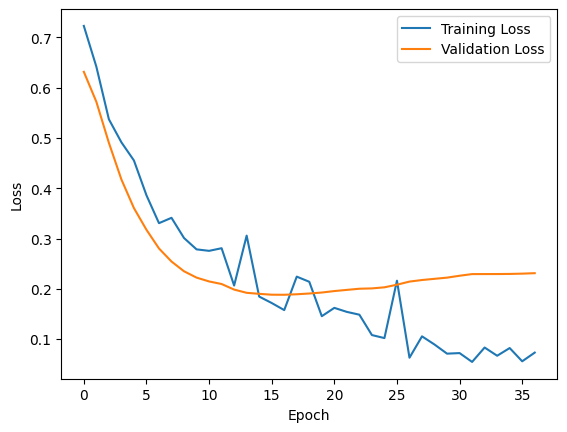

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from efficientnet.tfkeras import EfficientNetB2
import numpy as np
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/FinalDatasetTVT2/train',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    '/content/FinalDatasetTVT2/val',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    '/content/FinalDatasetTVT2/test',
    target_size=(128, 128),
    batch_size=1174,
    class_mode='binary')

# separate data and labels for training set
x_train, y_train = train_generator.next()

# separate data and labels for validation set
x_val, y_val = val_generator.next()

# separate data and labels for test set
x_test, y_test = test_generator.next()

# load pre-trained model
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# class_labels = np.unique(y_train)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# define callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# save the model weights after each epoch if the validation loss decreased
checkpoint = ModelCheckpoint('best_model.h5',
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='val_loss',
                             mode='min', verbose=1)

# reduce learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=15,
                              min_lr=0.0001, verbose=1)

# stop training if the validation loss doesn't improve for 30 consecutive epochs
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=50,
                    batch_size=128,
                    callbacks=[checkpoint, reduce_lr, early_stop],
                    class_weight=class_weights
                    )

# evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=1174)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

# evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
auc_score = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('A5.pdf')
plt.show()

# plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig('A4.pdf')
plt.show()

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('A3.pdf')
plt.show()

# plot accuracy and loss curves for training and validation sets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('A2.pdf')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('A1.pdf')
plt.show()

model.save('my_model.h5')